# Train Banana Navigation Agent
---
In this notebook, you will train a DQN agent with a Unity Banana Navigation environment

### 1. Start the Environment and Import Packages

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# add the path to your Unity environment
path_to_env = "/home/robert/RL_ubuntu/udacity_rlnd_navigation/Banana_Linux/Banana.x86_64"

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below. Be sure to press wait if asked.

If you have issues with the environment, restart. 

In [2]:
env = UnityEnvironment(file_name=path_to_env)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain)

Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [7]:
# Instantiate the Agent
from dqn_agent_nav import Agent

agent = Agent(state_size=37, action_size=4, seed=0)

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

Episode 20	Average Score: -0.45
Episode 40	Average Score: -0.17
Episode 60	Average Score: 0.222
Episode 80	Average Score: 0.51
Episode 100	Average Score: 0.76
Episode 120	Average Score: 1.51
Episode 140	Average Score: 2.07
Episode 160	Average Score: 2.65
Episode 180	Average Score: 3.25
Episode 200	Average Score: 4.08
Episode 220	Average Score: 4.66
Episode 240	Average Score: 5.60
Episode 260	Average Score: 6.28
Episode 280	Average Score: 7.04
Episode 300	Average Score: 7.80
Episode 320	Average Score: 8.53
Episode 340	Average Score: 8.89
Episode 360	Average Score: 9.47
Episode 380	Average Score: 10.06
Episode 400	Average Score: 10.40
Episode 420	Average Score: 10.86
Episode 440	Average Score: 11.48
Episode 460	Average Score: 12.15
Episode 480	Average Score: 12.70
Episode 500	Average Score: 13.18
Episode 520	Average Score: 13.71
Episode 540	Average Score: 13.84
Episode 560	Average Score: 14.17
Episode 580	Average Score: 14.52
Episode 600	Average Score: 14.86
Episode 620	Average Score: 14

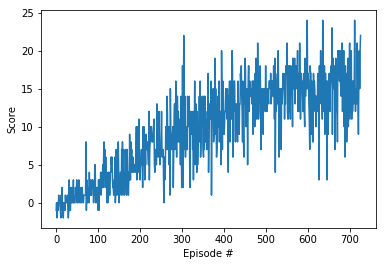

In [8]:
def dqn(n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, 
                       action, 
                       reward, 
                       next_state, 
                       done)                               # perform updates to Q
            state = next_state                             # roll over the state to next time step
            score += reward                                # update the score
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 20 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


### 4. Watch a Smart Agent

In [9]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

# watch the trained agent
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # get action from Q-Network
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 19.0


In [ ]:
env.close()